In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv('iris.data',
                      header=None)

df.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']

df = df.drop(columns=['class'])

df.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df_quad = df.copy()
#df_quad = df_quad.drop(columns=['class'])
df_quad.rename(columns={'sepal-length':'sl2', 'sepal-width':'sw2', 'petal-length':'pl2', 'petal-width':'pw2'}, inplace=True)
df_quad['sl2'] = df_quad['sl2'] * df_quad['sl2']
df_quad['sw2'] = df_quad['sw2'] * df_quad['sw2']
df_quad['pl2'] = df_quad['pl2'] * df_quad['pl2']
df_quad['pw2'] = df_quad['pw2'] * df_quad['pw2']
df_quad['sl_sw'] = 1.4142 * df['sepal-length'] * df['sepal-width']
df_quad['sl_pl'] = 1.4142 * df['sepal-length'] * df['petal-length']
df_quad['sl_pw'] = 1.4142 * df['sepal-length'] * df['petal-width']
df_quad['sw_pl'] = 1.4142 * df['sepal-width'] * df['petal-length']
df_quad['sw_pw'] = 1.4142 * df['sepal-width'] * df['petal-width']
df_quad['pl_pw'] = 1.4142 * df['petal-length'] * df['petal-width']
print(df_quad.iloc[1].to_numpy())
df_quad


[24.01      9.        1.96      0.04     20.78874   9.701412  1.385916
  5.93964   0.84852   0.395976]


,sl2,sw2,pl2,pw2,sl_sw,sl_pl,sl_pw,sw_pl,sw_pw,pl_pw
0,26.01,12.25,1.96,0.04,25.243470,10.097388,1.442484,6.929580,0.989940,0.395976
1,24.01,9.00,1.96,0.04,20.788740,9.701412,1.385916,5.939640,0.848520,0.395976
2,22.09,10.24,1.69,0.04,21.269568,8.640762,1.329348,5.883072,0.905088,0.367692
3,21.16,9.61,2.25,0.04,20.166492,9.757980,1.301064,6.576030,0.876804,0.424260
4,25.00,12.96,1.96,0.04,25.455600,9.899400,1.414200,7.127568,1.018224,0.395976
...,...,...,...,...,...,...,...,...,...,...
145,44.89,9.00,27.04,5.29,28.425420,49.270728,21.792822,22.061520,9.757980,16.913832
146,39.69,6.25,25.00,3.61,22.273650,44.547300,16.927974,17.677500,6.717450,13.434900
147,42.25,9.00,27.04,4.00,27.576900,47.799960,18.384600,22.061520,8.485200,14.707680
148,38.44,11.56,29.16,5.29,29.811336,47.347416,20.166492,25.964712,11.059044,17.564364


In [10]:
# normalize df_quad
for col in df_quad.columns:
    
    #df_quad[col] /= np.sqrt(np.square(df_quad[col]).sum(axis=0))
    df_quad[col] -= df_quad[col].mean()

for i in range(150):
    df_quad.iloc[i] /= np.sqrt(np.square(df_quad.iloc[i]).sum())
df_quad

,sl2,sw2,pl2,pw2,sl_sw,sl_pl,sl_pw,sw_pl,sw_pw,pl_pw
0,-0.268328,0.083287,-0.464478,-0.060124,0.001871,-0.692520,-0.279691,-0.269435,-0.122400,-0.237312
1,-0.316252,-0.015020,-0.446205,-0.057759,-0.128460,-0.676854,-0.270342,-0.287781,-0.121719,-0.227976
2,-0.357121,0.020367,-0.435477,-0.055390,-0.109709,-0.678838,-0.260842,-0.277566,-0.115141,-0.219420
3,-0.390866,0.002755,-0.428173,-0.056499,-0.143454,-0.660465,-0.266869,-0.263299,-0.118254,-0.222192
4,-0.295109,0.103509,-0.458327,-0.059328,0.008217,-0.689296,-0.276837,-0.259921,-0.119929,-0.234170
...,...,...,...,...,...,...,...,...,...,...
145,0.367133,-0.018738,0.358220,0.119455,0.118316,0.599024,0.407150,0.229082,0.173154,0.318137
146,0.273504,-0.183504,0.437442,0.089662,-0.163526,0.657726,0.354029,0.106598,0.095933,0.294753
147,0.319768,-0.022124,0.422950,0.085480,0.103149,0.643920,0.333929,0.270477,0.149623,0.280604
148,0.134589,0.076200,0.444615,0.121940,0.172385,0.539865,0.355059,0.379192,0.225204,0.348979


In [11]:
import numpy as np
dot_products_quad = np.ones((150, 150))
for i in range(150):
    for j in range(150):
        dot_products_quad[i, j] = np.dot(df_quad.iloc[i], df_quad.iloc[j])
        
print(dot_products_quad)

[[ 1.          0.98497819  0.98693094 ... -0.98614805 -0.92901399
  -0.94755061]
 [ 0.98497819  1.          0.99814507 ... -0.99384119 -0.94877726
  -0.92466948]
 [ 0.98693094  0.99814507  1.         ... -0.99297625 -0.93264776
  -0.91110198]
 ...
 [-0.98614805 -0.99384119 -0.99297625 ...  1.          0.95798408
   0.92690326]
 [-0.92901399 -0.94877726 -0.93264776 ...  0.95798408  1.
   0.95328247]
 [-0.94755061 -0.92466948 -0.91110198 ...  0.92690326  0.95328247
   1.        ]]


In [12]:
# compute kernel (x^Ty)^2
K = np.ones((150, 150))
for i in range(150):
    for j in range(150):
        K[i, j] = np.dot(df.iloc[i], df.iloc[j]) * np.dot(df.iloc[i], df.iloc[j])

In [13]:
# compute centered Kernel

H = np.identity(150) - 1/150 * np.ones((150, 150))
# center Kernel
K_hat = np.matmul(np.matmul(H, K), H)
K_hat

array([[1079.40592114, 1106.7314778 , 1156.34647647, ..., -752.24572753,
        -819.6680442 , -498.6703422 ],
       [1106.7314778 , 1169.62453447, 1217.37873314, ..., -789.16067086,
        -871.38658753, -506.55728553],
       [1156.34647647, 1217.37873314, 1271.7964318 , ..., -822.1912722 ,
        -893.20238886, -520.46878686],
       ...,
       [-752.24572753, -789.16067086, -822.1912722 , ...,  539.0765238 ,
         597.31980714,  344.72950914],
       [-819.6680442 , -871.38658753, -893.20238886, ...,  597.31980714,
         721.18489047,  410.07519247],
       [-498.6703422 , -506.55728553, -520.46878686, ...,  344.72950914,
         410.07519247,  256.58839447]])

In [14]:
W = np.identity(150)
for i in range(150):
    W[i, i] = 1.0 / np.sqrt(K_hat[i, i])

K_hat_n = np.matmul(np.matmul(W, K_hat), W)
K_hat_n

array([[ 1.        ,  0.98497822,  0.98693098, ..., -0.98614805,
        -0.92901408, -0.94755109],
       [ 0.98497822,  1.        ,  0.99814509, ..., -0.99384118,
        -0.94877739, -0.92467013],
       [ 0.98693098,  0.99814509,  1.        , ..., -0.99297623,
        -0.932648  , -0.91110281],
       ...,
       [-0.98614805, -0.99384118, -0.99297623, ...,  1.        ,
         0.95798431,  0.92690398],
       [-0.92901408, -0.94877739, -0.932648  , ...,  0.95798431,
         1.        ,  0.95328264],
       [-0.94755109, -0.92467013, -0.91110281, ...,  0.92690398,
         0.95328264,  1.        ]])

In [15]:
e_values, e_vectors = np.linalg.eig(K_hat_n)
#print(f'eigenvalues \n {e_values}')
#print(f'eigenvectors \n {e_vectors}')
sum = 0
n = 0
i = 0
while sum < 0.9 * e_values.sum():
    sum += e_values[i]
    n += 1
    i += 1
    
print(n)

2


In [16]:
C_r = np.stack([e_vectors[0], e_vectors[1]], axis=1)
C_r.shape

(150, 2)

(2, 150)


/Users/edvard/.local/share/virtualenvs/pyml-ZGva7g9H/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


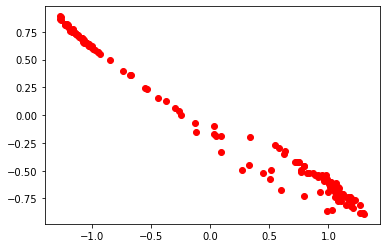

In [17]:
new_data = np.matmul(C_r.transpose(), K_hat_n)
print(new_data.shape)
import matplotlib.pyplot as plt
plt.scatter(new_data[0, :], new_data[1, :], color='red', marker='o', label='Point')
plt.show()


In [18]:
#sklearn version
e_vals, e_vectors = np.linalg.eig(K_hat_n)

e_vals_real = np.array([i.real for i in e_vals], dtype=float)
tot = e_vals_real.sum()
var_exp = [(i / tot) for i in sorted(e_vals_real, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

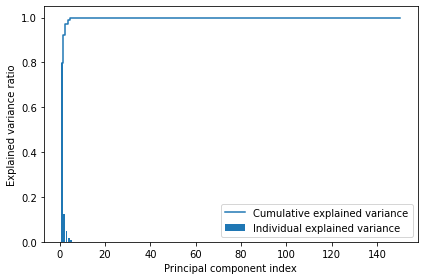

In [19]:
import matplotlib.pyplot as plt


plt.bar(range(1, 151), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 151), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(df)

transformer = KernelPCA(n_components=2, kernel='poly', degree=2)
X_transformed = transformer.fit_transform(X_train_std)
X_transformed.shape

(150, 2)

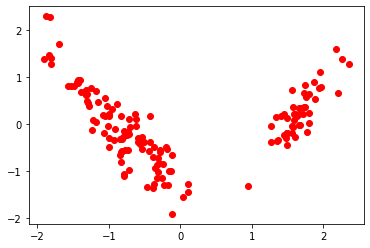

In [22]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], color='red', marker='o', label='Point')
plt.show()